## Simulating Data

We'll start our statistical analysis of financial data with the concept of *simulating* a data set.  This is useful for two reasons.  First, it gives us explicit control over what the data looks like.  When we turn to testing/analyzing data, having specified clear properties of the data will make it easier to see how the analysis reflects the underlying structure to the data.  Second, some types of more complex analytics require simulation (on top of using real data).  Option pricing is a classic example of this, and one that we will explore later.

Randomness is impossible for a computer to create.  This is because computers only respond to instructions, and thus any simulated "randomness" is actually just a response to instructions by a human.  For example, suppose that you simulate a coin flip on a computer.  The coin is fair, and so you tell the computer that with probability one half the coin lands on heads, and with probability one half the coin lands on tails.  But your computer doesn't have a real, physical coin to flip.  It has to predict a coin flip, using a **random number generator** (RNG).  This RNG will return either the value "heads" or "tails" to the human, but the process by which the RNG selects either "heads" or "tails" is determined by the programmer who created the RNG.  Confused?  Let's step through an example problem.  In this case, we want to simulate the roll of a regular six-sided die.

Start by importing the `numpy` module.

In [1]:
import numpy as np

Next, use the `random` sub-module of `numpy` to make use of the function `randint()`.  The function `randint()` takes two arguments, a value for `low` and a value for `high`.  Try running the following block of code several times.

In [2]:
np.random.randint(low=1, high=6)

3

The `randint(low=1, high=6)` command is "randomly" selecting a number between 1 and 6.

What makes this not truly random is the fact that the RNG generating random numbers for the `randint()` function was written by a human.  The RNG is simply a pre-defined process that follows the instructions of the author of the RNG.

We can control the RNG process with a **seed**.  The seed value controls the start of the RNG procedure, so that if we specify a seed before using a RNG, we have an explcitly defined path that the RNG will follow (even though, without looking at the code for the RNG, we won't be able to know preceisely what this path looks liked).

For example, run this following block of code several times.

In [3]:
np.random.randint(low=1, high=6, size=10)

array([1, 3, 1, 1, 2, 5, 1, 5, 3, 2])

Now, specify a seed and run the following multiple times.

In [4]:
np.random.seed(12345)
print( np.random.randint(low=1, high=6, size=50 ) )

[3 2 5 2 3 2 2 4 2 4 1 3 2 4 3 2 3 4 1 2 4 5 1 4 5 5 4 4 2 4 3 4 1 3 5 4 4
 5 4 1 4 1 1 4 3 5 5 1 2 3]


In this latter scenario, the list of random numbers does not change.  The seed forces the RNG to start in a particular way, so the "randomly" generated numbers are guaranteed to always be the same.

To ensure that the simulated output for some of this chapter is consistent across multiple runs through Python, many of the code blocks in this chapter will begin by setting a seed value.

When there is an equal chance of being "heads" or "tails", or having an equal chance of the die rolling on 1, 2, 3, 4, 5, or 6, probabilities are said to follow a *uniform* distribution.  The probability of any particular outcome is uniformly the same for all outcomes.

For our purposes, the *normal* distribution is more commonly used than a uniform distribution.  This is explored in the next section.

### Normal Distribution

Begin by simulating data according to a normal distribution.

/mnt/software/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

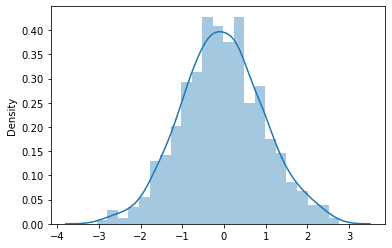

In [5]:
import seaborn as sns

np.random.seed(0)
norm = np.random.normal(0, 1, 1000) # 1000 draws with a mean of 0 and std. dev. of 1
sns.distplot(norm)

The `distplot()` function inside `seaborn` does two things at once: it plots a histogram of the data (the bars) as well as the kernel density estimate of the distribution (the line).

Note that in the above we specified a given mean and standard deviation for the distribution.  The variance is simply the square of the standard deviation, so we instantly know what that is.  Moreover, the normal distribution is said to be *symmetric* (the shape of the density to the left of the mean is the same as the shape of the distribution to the right of the mean).  That means there is no skewness in this distribution.  Consequently, the median of a sample of normally distributed data should approximately equal the mean.

The histogram represent actual draws from the RNG.  A higher bar means that more of the 1000 random draws correspond to the range specified on the x-axis.  The kernel denstiy estimate plots a fitted distribution based on the data, and shows what the distribtuion might look like if we simulated many, many more random numbers.  For example, let's up the number of simulated draws to 5000.

/mnt/software/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

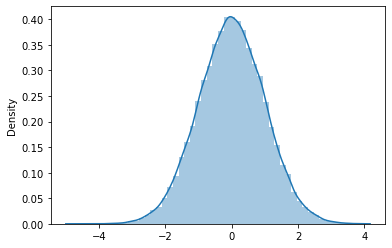

In [6]:
np.random.seed(0)
norm = np.random.normal(0, 1, 50000)
sns.distplot(norm)

Here, the bars are closer to the fitted line.  

The `seaborn` module is great for those who like convenient plots, as we've seen using `kdeplot()`, `boxplot()`, and `distplot()`.  We'll use three more plot functions, `lineplot()`, `scatterplot()` and `lmplot()` in the next section.

### Application: Simulating Stock Returns

Suppose that a stock has an annualized volatility of $20\%$.  Thus, the standard deviation of stock returns over a one-year period is $0.2$.  The daily stock return volatility is then $\frac{0.2}{\sqrt{252}}$ because there are $252$ trading days in a year.

Simulate 252 daily stock returns with mean $0$ and standard deviation $\frac{0.2}{\sqrt{252}}$.

In [7]:
np.random.seed(0)
returns = np.random.normal(0, .2/np.sqrt(252), 252)

<AxesSubplot:>

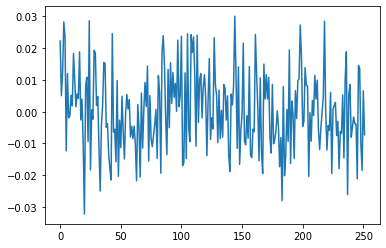

In [8]:
sns.lineplot(x=range(252), y=returns)

To convert todays price in to the price of the stock in one year, we need to get the cumulative return over the series of daily returns in the list variable `returns`.

In [9]:
price = 100*np.cumprod(1+returns)

<AxesSubplot:>

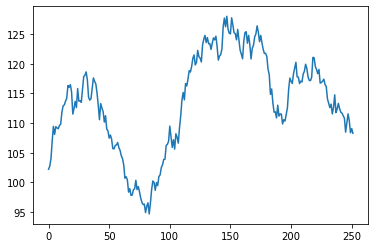

In [10]:
sns.lineplot(x=range(252), y=price)

In this simulation, the stock price ends at:

In [11]:
price[251]

108.29511702951602